# Análisis de series temporales

Las series temporales son un tipo de dato particular, ya que corresponden al registro discreto de valores de un fenómeno continuado en el tiempo. Esto establece el eje temporal como un índice vital a la hora de entender la evolución de ese fenómeno temporal y poder realizar tanto análisis como inferencia con esta información.

## Intervalos

Los intervalos en los que se registran estos eventos dependen del fenómeno a observar en cuestión. Veámoslo con unos ejemplos:

* Presupuesto anual: Anual
* Evolución de las ventas: Trimestral
* Evolución de la nómina: Mensual
* Carro de la compra: Semanal
* Consumo energético semanal: Diario
* Frecuencia de los trenes/autobuses: Horaria
* Precio de los stock: Minutal
* Tráfico web: Segundos
* Electrocardiograma: Milisegundos
* Aleteo de un colibrí: Microsegundos

Estos periodos se mantienen relevantes en distintos momentos temporales, siendo habitual el submuestreo o sobremuestreo dependiendo de dicha relevancia.

## Valores no existentes

Dado que una serie temporal muestra solo la información observada, suele ser habitual intentar inferir la información faltante. Rellenar información intermedia entre datos existentes se conoce como **interpolación** mientras que la proyección hacia adelante o atrás de los valores extremos se conoce como **extrapolación**.

## Variabilidad

Existen tipos de series en función de la frecuencia de los eventos. Habitualmente se trabaja unicamente con series continuadas pero en el caso de eventos menos usuales se determina del periodo inter-valor y la variabilidad entre valores para determinar su naturaleza.

![demanda](https://imgs.search.brave.com/52WmQzAYewunLPGM2Vm2K9_4BTvoX9etjNFgGGTVDsY/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9mcmVw/cGxlLmNvbS93cC1j/b250ZW50L3VwbG9h/ZHMvZm9yZWNhc3Rh/YmlsaXR5LWRlbWFu/ZC1wYXR0ZXJucy5w/bmc)

Las series temporales pueden ser de un único valor:

* Serie univariante (precio de un stock/activo)
* Series multivariante (datos de estación meteorológica)

El objetivo del análisis de las series pretende **realizar un análisis descriptivo que permita predecir el futuro**. Para ello es importante que las series muestren ser estacionarias, es decir, que la variabilidad de las muestras no varíe para distintos momentos de la serie.



Carguemos unos datos ejemplo.

In [1]:
import pandas as pd

# Import as Dataframe de consumo de fármacos
df = pd.read_csv('data/a10.csv', parse_dates = ['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [2]:
# Date in Index
df = pd.read_csv('data/a10.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [3]:
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [4]:
# Si no nos pilla bien la fecha
df['fecha_str'] = df.index.astype(str)
df[['year', 'month', 'day']] = df['fecha_str'].str.split('-', expand=True)

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

df['new_date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,value,fecha_str,year,month,day,new_date
date,,,,,,
1991-07-01,3.526591,1991-07-01,1991,7,1,1991-07-01
1991-08-01,3.180891,1991-08-01,1991,8,1,1991-08-01
1991-09-01,3.252221,1991-09-01,1991,9,1,1991-09-01
1991-10-01,3.611003,1991-10-01,1991,10,1,1991-10-01
1991-11-01,3.565869,1991-11-01,1991,11,1,1991-11-01


## Visualizando series temporales

Teniendo los datos en formato fecha y ordenados, es sencilla la representación. Un `plot` de matplotlib.pyplot sería suficiente.

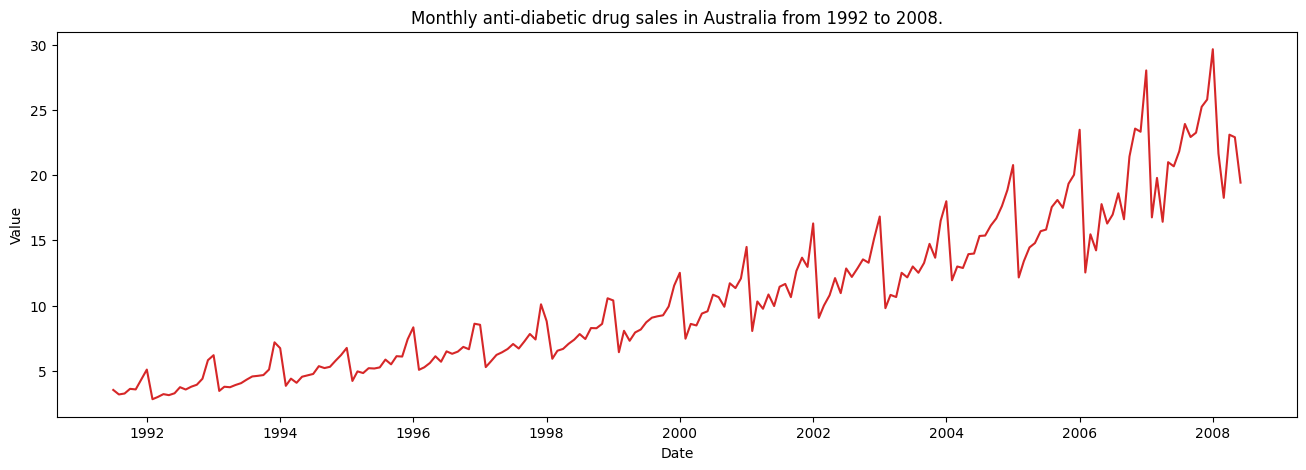

In [5]:
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

Podemos enfatizar el crecimiento de los datos creando una gráfica simétrica

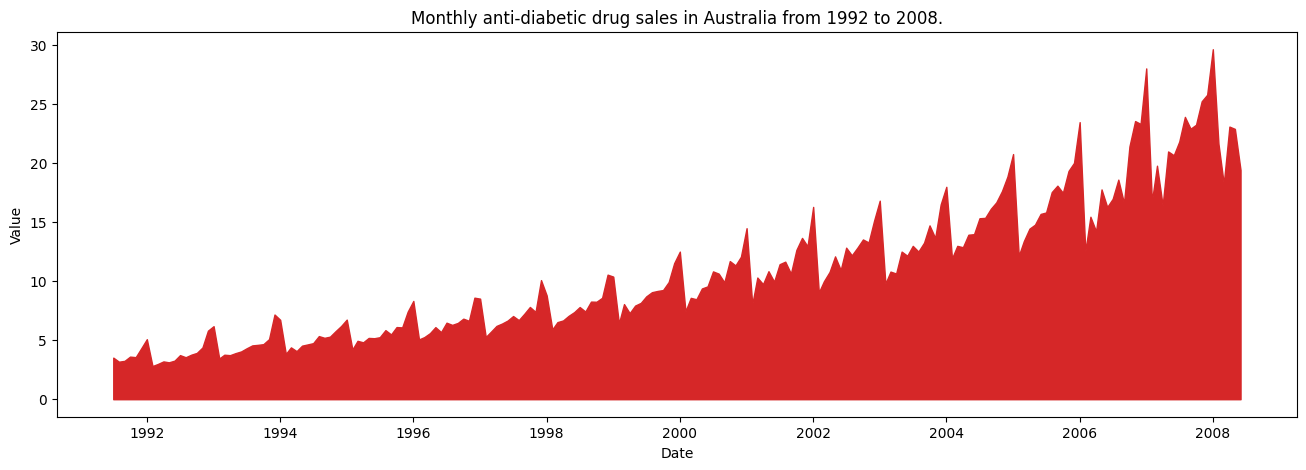

In [6]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.fill_between(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

Puesto que tenemos datos mensuales, con cierto patrón repetitivo, podremos visualizar una comparativa año a año.

Es posible observar que hay un gran consumo de fármacos en enero, y gran caida en febrero.

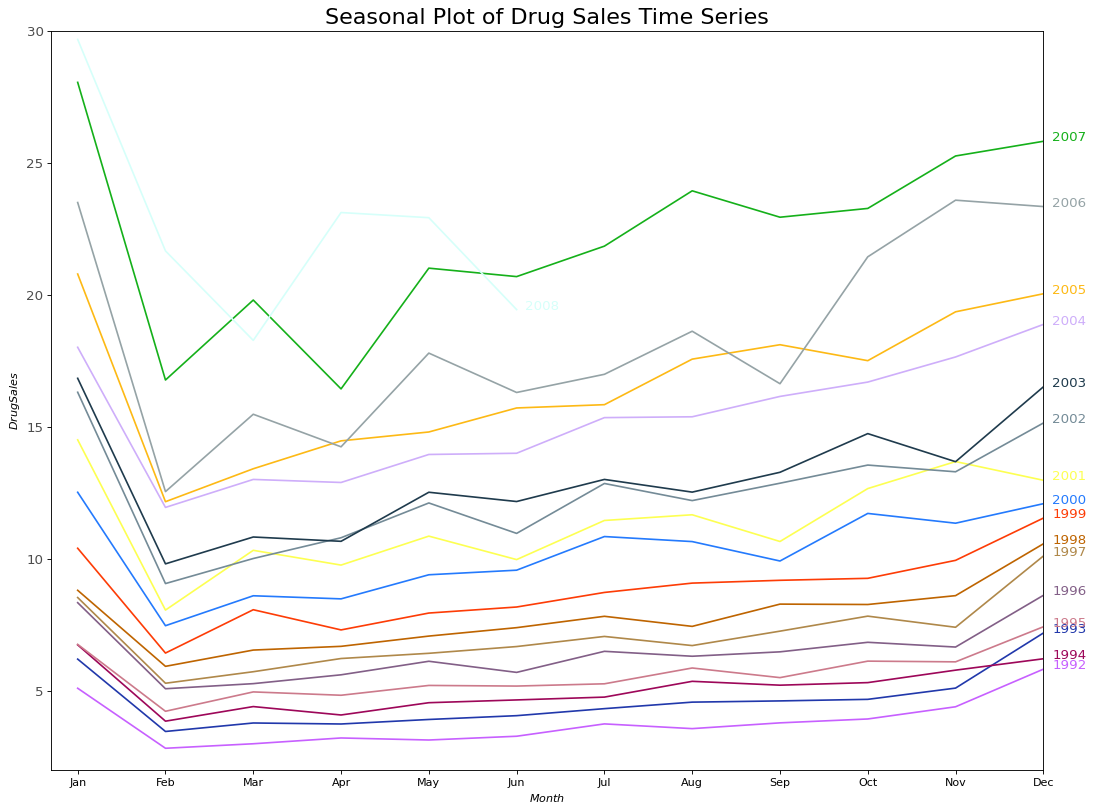

In [7]:
import numpy as np
import matplotlib as mpl

# Import Data
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

Vemos que cada año van incrementando las ventas, pero no se aprecia bien en la anterior gráfica. Podemos ver en un diagrama de caja cómo evolucionan las ventas anuales para destacar mejor ese progreso, y cómo varía cada año.

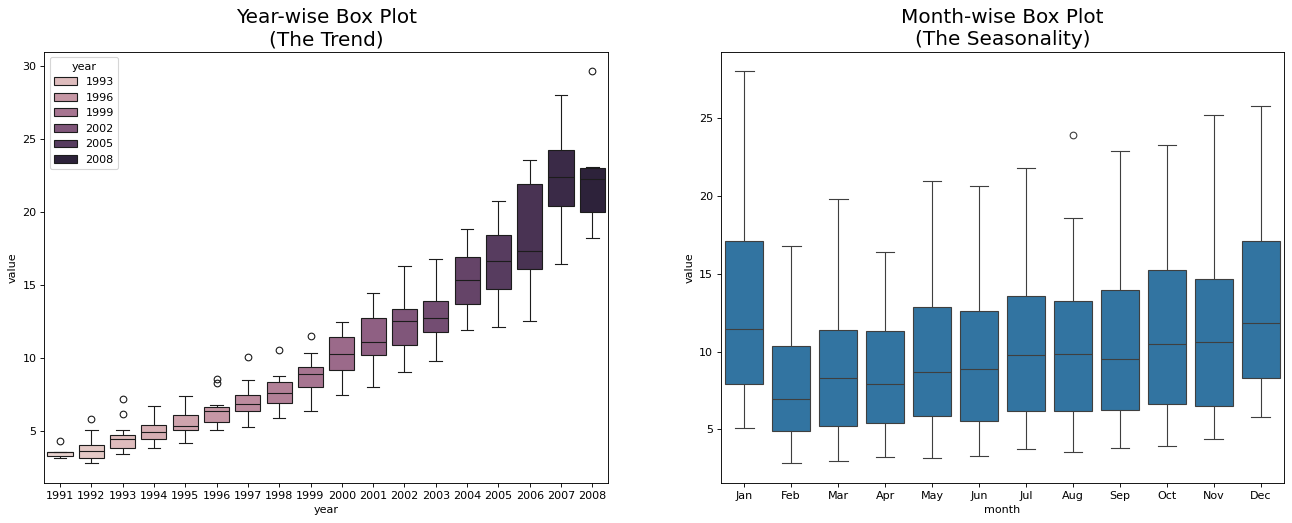

In [9]:
import seaborn as sns

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0], hue='year')
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## Comprobar estacionariedad

Utilizamos los root test para comprobar si la serie es stationary. La hipótesis nula de los test supone que la serie NO es estacionaria. Si el resultado del test queda por debajo del nivel de significación (0.05), rechazaremos la hipótesis nula en favor de la alternativa. La serie será estacionaria. En caso contrario la serie NO es estacionaria y por tanto habrá que aplicar técnicas de diferenciación.

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'].values)
result[1]

1.0

## Descomposición de series temporales

Las series temporales se pueden descomponer en:

**Modelo aditivo**: Y(t) = T(t) + S(t) + c(t) + e(t)

**Modelo multiplicativo**: Y(t) = T(t) * S(t) * c(t) * e(t)

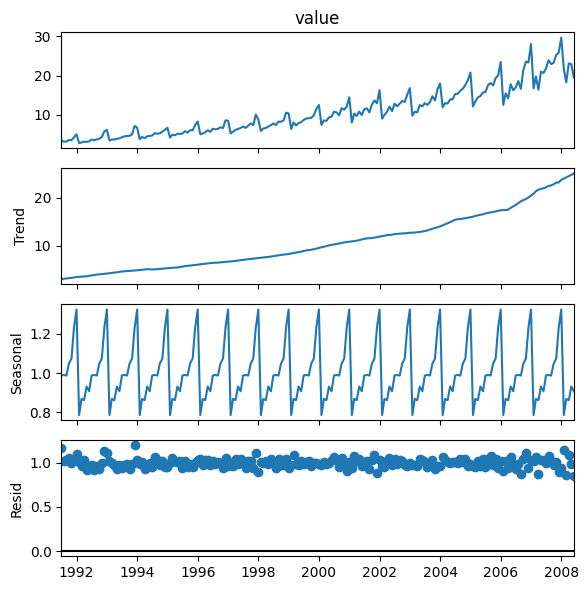

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('data/a10.csv', parse_dates = ['date'], index_col = 'date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model = 'multiplicative', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

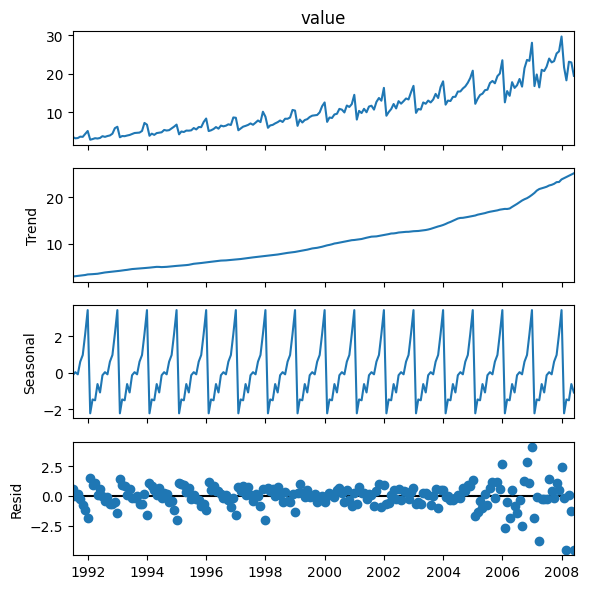

In [12]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model = 'additive', extrapolate_trend = 'freq')

result_add.plot();

In [13]:
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis = 1)
df_reconstructed.columns = ['seasonal', 'trend', 'resid', 'actual_values']
df_reconstructed.tail()

,seasonal,trend,resid,actual_values
date,,,,
2008-02-01,0.785976,24.037399,1.146165,21.654285
2008-03-01,0.868249,24.298458,0.865756,18.264945
2008-04-01,0.861883,24.559516,1.091662,23.107677
2008-05-01,0.931613,24.820574,0.990890,22.912510
2008-06-01,0.907423,25.081633,0.853780,19.431740


In [14]:
df_reconstructed['check_multiplicate'] = df_reconstructed['seasonal'] * df_reconstructed['trend'] * df_reconstructed['resid']
df_reconstructed

,seasonal,trend,resid,actual_values,check_multiplicate
date,,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869,3.565869
...,...,...,...,...,...
2008-02-01,0.785976,24.037399,1.146165,21.654285,21.654285
2008-03-01,0.868249,24.298458,0.865756,18.264945,18.264945
2008-04-01,0.861883,24.559516,1.091662,23.107677,23.107677


In [15]:
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_reconstructed.columns = ['seasonal', 'trend', 'resid', 'actual_values']
df_reconstructed['check_additive'] = df_reconstructed['seasonal'] + df_reconstructed['trend'] + df_reconstructed['resid']
df_reconstructed.tail()

,seasonal,trend,resid,actual_values,check_additive
date,,,,,
2008-02-01,-2.232334,24.037399,-0.150780,21.654285,21.654285
2008-03-01,-1.469959,24.298458,-4.563554,18.264945,18.264945
2008-04-01,-1.518226,24.559516,0.066387,23.107677,23.107677
2008-05-01,-0.624341,24.820574,-1.283723,22.912510,22.912510
2008-06-01,-1.086958,25.081633,-4.562935,19.431740,19.431740


## Tendencia

La tendencia es la línea base que guía la dinámica principal de una serie.

In [16]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df['value'], model='aditive', extrapolate_trend='freq')

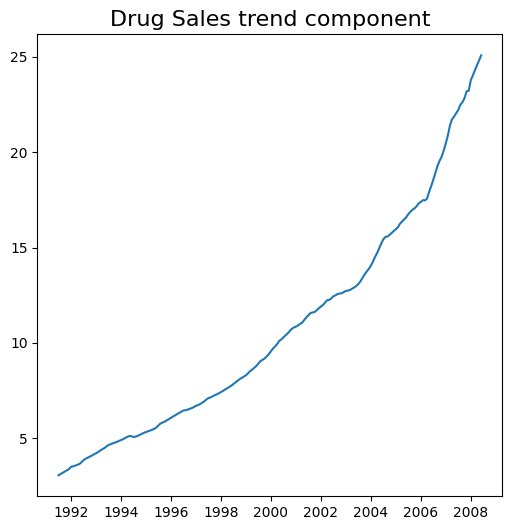

In [17]:
plt.plot(result_add.trend)
plt.title('Drug Sales trend component', fontsize=16);

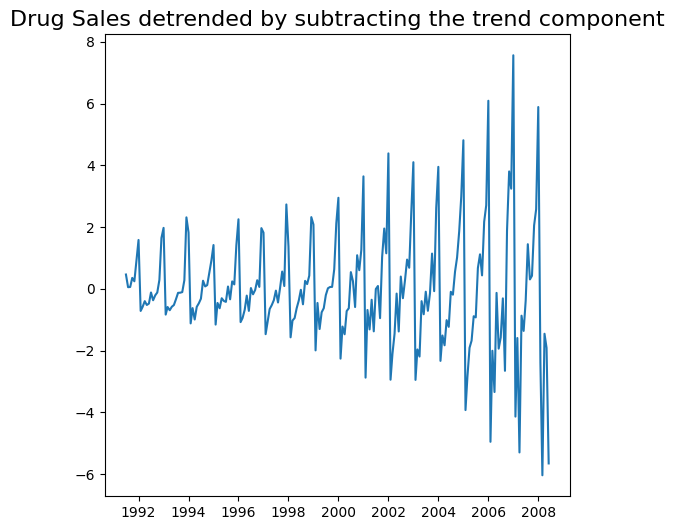

In [18]:
detrended = df.value.values - result_add.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16);

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

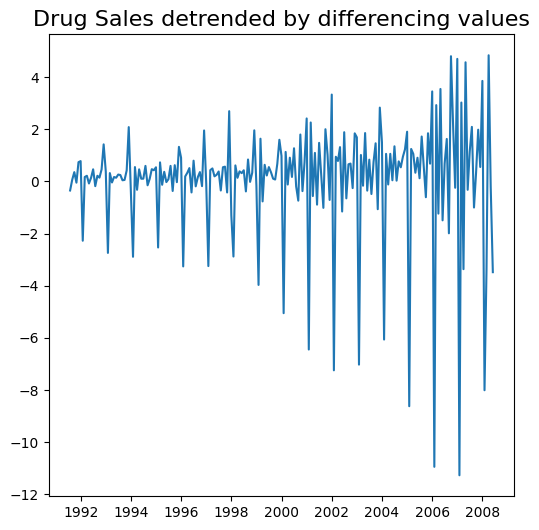

In [19]:
plt.plot(df.value.diff(periods=1))

plt.title('Drug Sales detrended by differencing values', fontsize=16);

In [22]:
print(adfuller(df.value.diff().dropna().values)[1])

0.11665341686468961


In [24]:
print(adfuller(df.value.diff().diff().dropna().values)[1])

3.543916358529571e-18


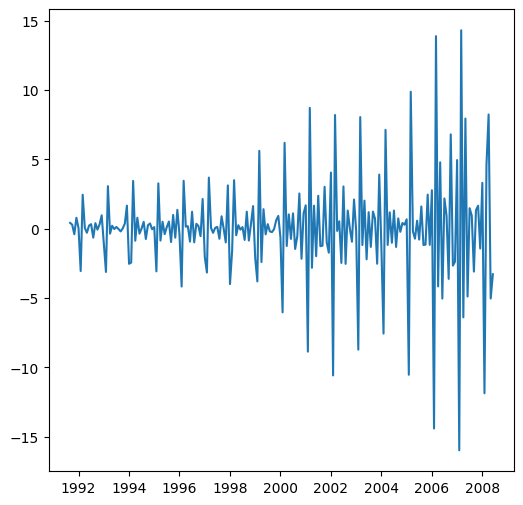

In [27]:
plt.plot(df.value.diff().diff().dropna())

Una forma de extraer la tendencia es mediante el suavizado de la curva.

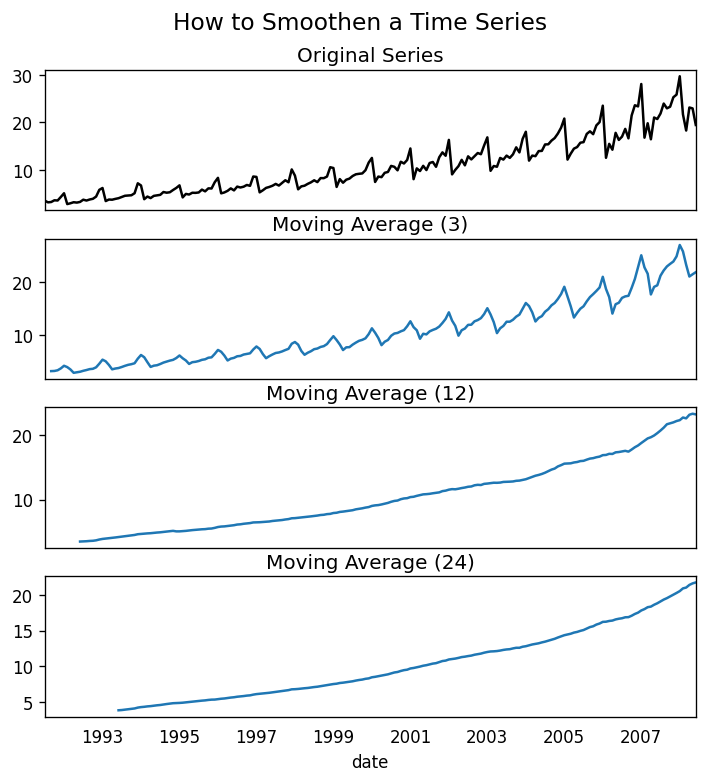

In [28]:
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Moving Average
df_ma = df.value.rolling(3).mean()
df_ma_12 = df.value.rolling(12).mean()
df_ma_24 = df.value.rolling(24).mean()

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['value'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Moving Average (3)')
df_ma_12.plot(ax=axes[2], title='Moving Average (12)')
df_ma_24.plot(ax=axes[3], title='Moving Average (24)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

**LOWESS (Locally Weighted Scatterplot Smoothing)**

https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html

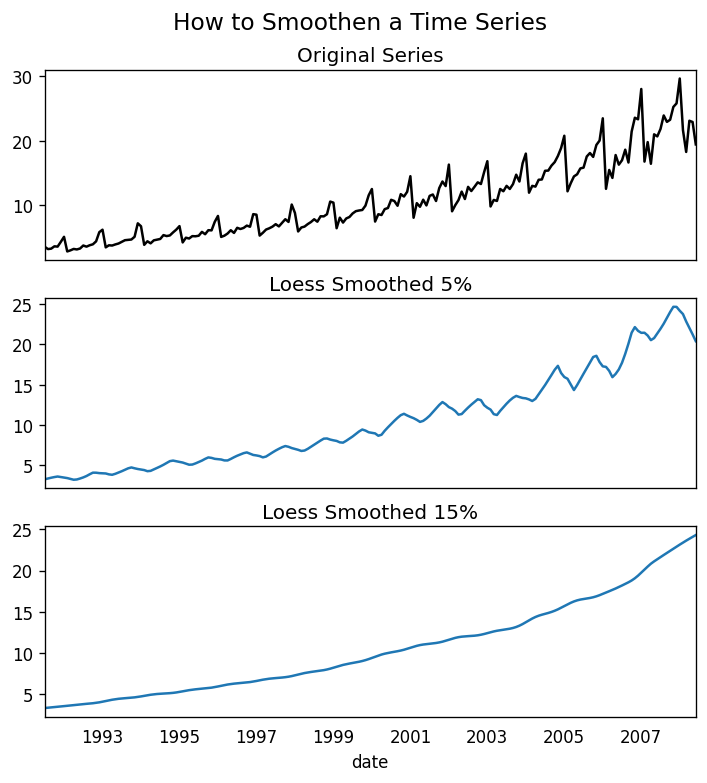

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.05)[:, 1], index=df.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.15)[:, 1], index=df.index, columns=['value'])

# Plot
fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
df['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

## Estacionalidad

La componente estacional hace referencia a una tendencia periódica dentro de la propia serie. Determina repeticiones temporales como fines de semana, ciclo solar-lunar en un día,...

Podemos eliminarle el componente estacional de la descomposición anterior. Vemos en este ejemplo que el modelo aditivo no es el ideal ya que siguen apareciendo patrones estacionales en la serie.

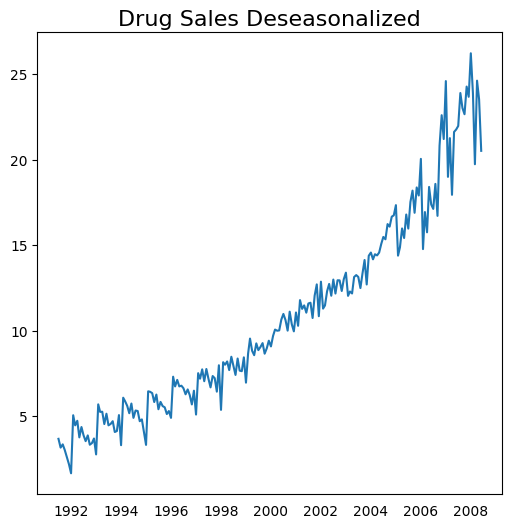

In [22]:
# Time Series Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values - result_add.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16);

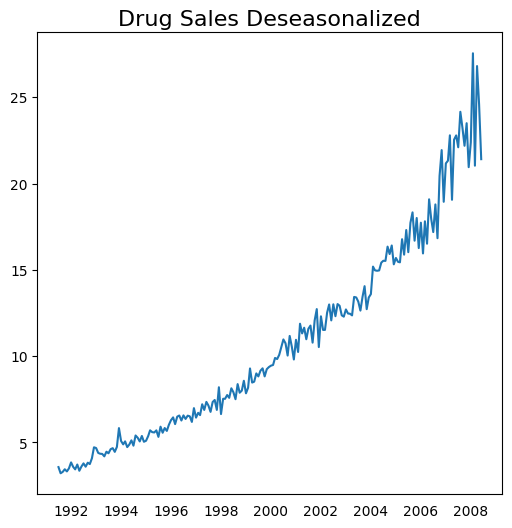

In [23]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16);

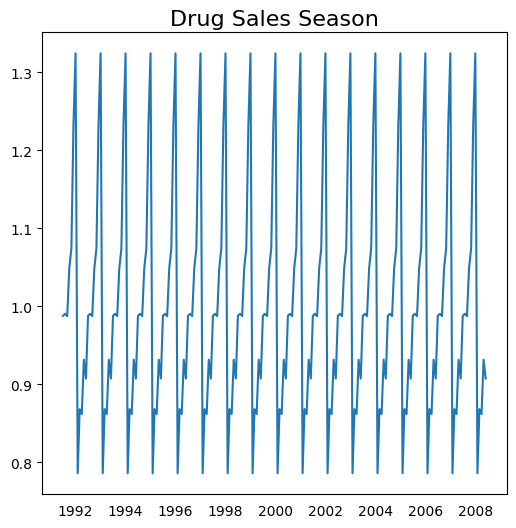

In [29]:
plt.plot(result_mul.seasonal)
plt.title('Drug Sales Season', fontsize=16);

### Comprobación de estacionalidad y autocorrelación

**Autocorrelación**

La autocorrelación mide la relación lineal entre una observación y sus observaciones anteriores en distintos retardos (_lags_). Representa la estructura de correlación global de la serie temporal, incluidas las relaciones directas e indirectas entre las observaciones. La autocorrelación es útil para identificar el orden de un proceso de media móvil (MA).

**Autocorrelación parcial**

Por otra parte, la autocorrelación parcial mide la relación lineal directa entre una observación y sus observaciones anteriores en un desfase específico, excluyendo las contribuciones de los desfases intermedios. Destaca las relaciones entre las observaciones en rezagos específicos, sin tener en cuenta los efectos indirectos de otros rezagos. La autocorrelación parcial es útil para identificar el orden de un proceso autorregresivo (AR).

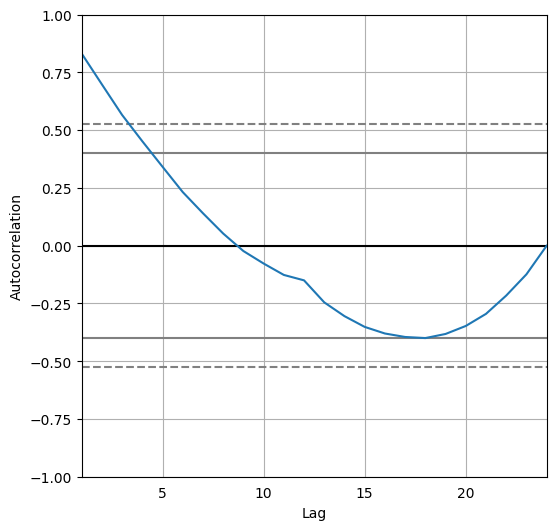

In [30]:
from statsmodels.tsa.stattools import acf
from pandas.plotting import autocorrelation_plot

acf_vals = acf(df.value.values)
autocorrelation_plot(acf_vals);

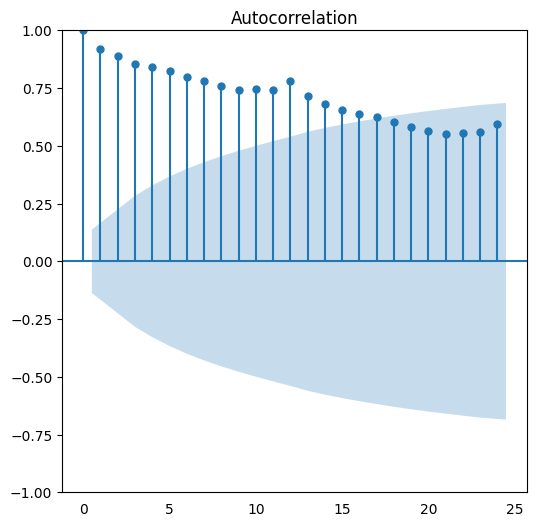

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.value.values);

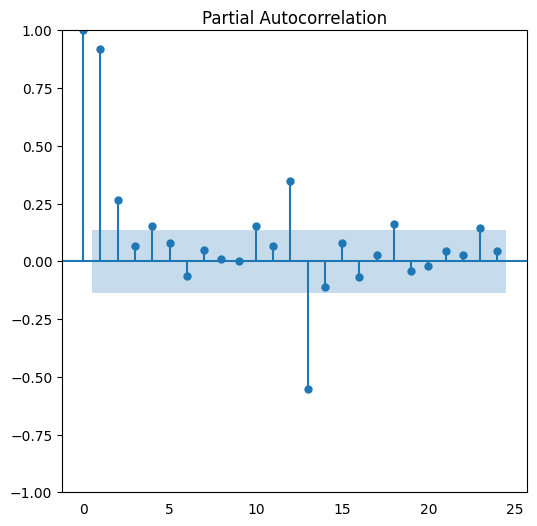

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df.value.values);

## Valores faltantes

In [33]:
df = pd.read_csv('data/a10_missings.csv', parse_dates = ['date'], index_col = 'date')
df[df['value'].notna()]

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-10-01,3.611003
1991-12-01,4.306371
1992-02-01,2.814520
...,...
1999-05-01,7.936916
1999-06-01,8.165323
1999-08-01,9.070964


In [34]:
df[~df['value'].notna()]

,value
date,
1991-09-01,NaN
1991-11-01,NaN
1992-01-01,NaN
1992-09-01,NaN
1992-10-01,NaN
1993-04-01,NaN
1993-09-01,NaN
1994-06-01,NaN
1994-10-01,NaN


In [35]:
df.index.min()

Timestamp('1991-07-01 00:00:00')

In [36]:
df.index.max()

Timestamp('1999-10-01 00:00:00')

In [37]:
len(df.index)

100

In [38]:
pd.date_range(df.index.min(),df.index.max(), freq="M")

/tmp/ipykernel_29917/2197063464.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(df.index.min(),df.index.max(), freq="M")


DatetimeIndex(['1991-07-31', '1991-08-31', '1991-09-30', '1991-10-31',
               '1991-11-30', '1991-12-31', '1992-01-31', '1992-02-29',
               '1992-03-31', '1992-04-30', '1992-05-31', '1992-06-30',
               '1992-07-31', '1992-08-31', '1992-09-30', '1992-10-31',
               '1992-11-30', '1992-12-31', '1993-01-31', '1993-02-28',
               '1993-03-31', '1993-04-30', '1993-05-31', '1993-06-30',
               '1993-07-31', '1993-08-31', '1993-09-30', '1993-10-31',
               '1993-11-30', '1993-12-31', '1994-01-31', '1994-02-28',
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31', '1996-01-31', '1996-02-29',
      

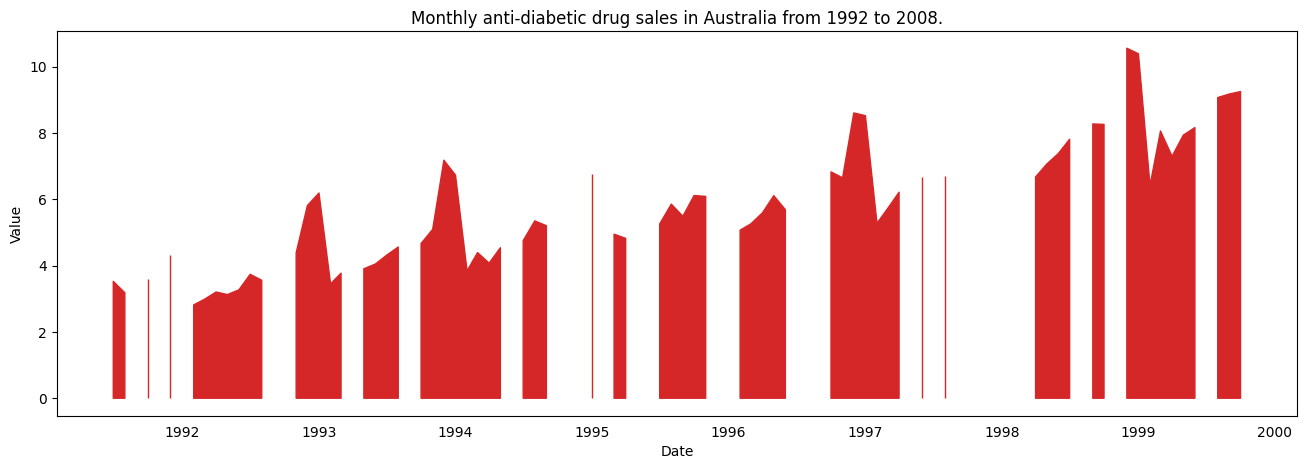

In [39]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

/tmp/ipykernel_29917/2978573598.py:74: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):


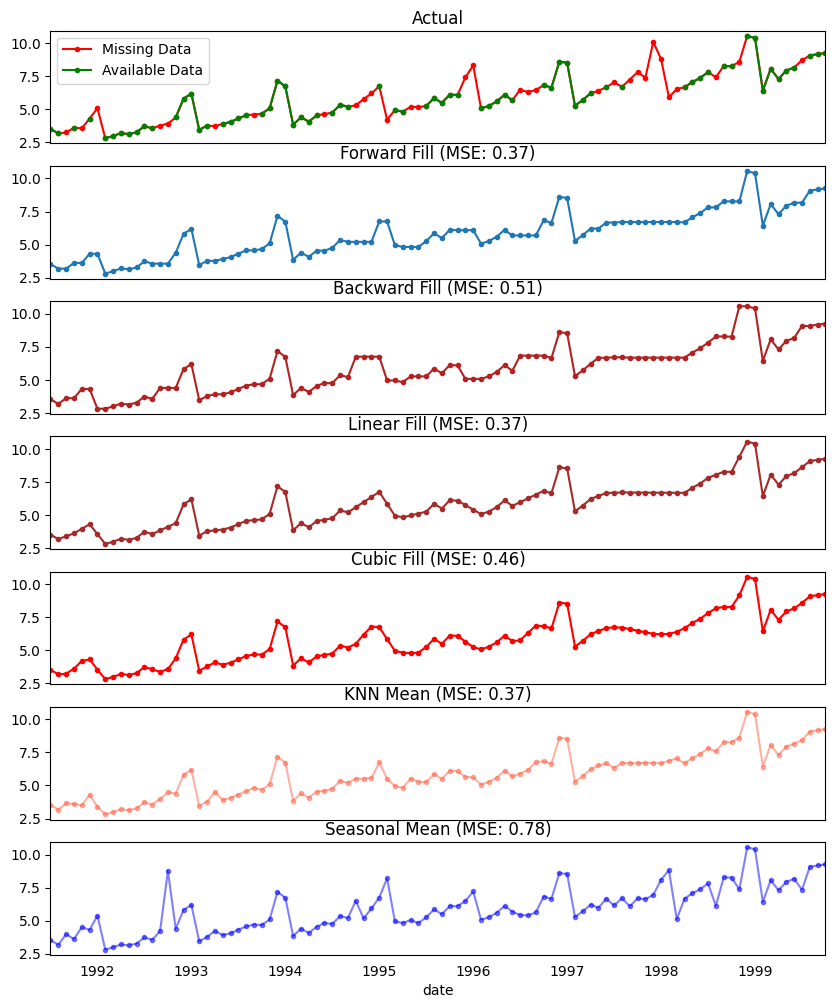

In [40]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])


## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")


## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------

df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])

error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-");

Referencias:

* Hands on Time Series https://learning.oreilly.com/library/view/hands-on-time-series/9781484259924/
* Time Series con otros modelos https://learning.oreilly.com/videos/time-series-analysis/9781838640590/?autoplay=false
* Métodos de Smoothing https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
* Un libro online bastante completo https://otexts.com/fpp2/
* Curso de la UCM sobre el tema https://www.ucm.es/data/cont/docs/518-2013-11-11-JAM-IAST-Libro.pdf
* En este artículo te cuenta bastante bien el tema de la multicolinealidad en una regresión https://medium.com/swlh/how-multicollinearity-is-a-problem-in-linear-regression-dbb76e25cd80